# VINCULACION DE BASE FINAL

In [ ]:
!pip install -U scikit-plot

In [ ]:
!pip install --upgrade scikit-learn

In [ ]:
!pip install --upgrade scipy scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 MB 23.7 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires scipy<1.14.0,>=1.7.0, but you have scipy 1.14.1 which is incompatible.


In [ ]:
!pip install dask[complete] dask-ml
!pip install --upgrade pycaret

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.8/149.8 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 21.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 39.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.2/243.2 kB 15.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 237.3/237.3 kB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 7.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 24.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 51.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 5.6 MB/s eta 0:00:00
   ━━

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from tabulate import tabulate
import numpy as np
import seaborn as sns

In [ ]:
#Para cuando se ejecuta desde google
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Para cuando se carga desde el usuario de Cristian Borrero
df= pd.read_excel("drive/My Drive/Base_bruta_v7.xlsx")

In [ ]:
# Para cuando se carga desde el usuario de Angie Vela
###df= pd.read_excel("drive/My Drive/Proyecto de Profundización II/Base_bruta_v6.xlsx")

In [ ]:
# prompt: genere un codigo que indique el tipo de dato de cada columna de data frame y si tiene valores nulos

import pandas as pd
def analyze_dataframe(df):
  """
  Analyzes a pandas DataFrame to determine data types and null values for each column.

  Args:
    df: The pandas DataFrame to analyze.

  Returns:
    A pandas DataFrame with column names, data types, and null value counts.
  """

  info_df = pd.DataFrame({
      'Column Name': df.columns,
      'Data Type': df.dtypes.values,
      'Null Count': df.isnull().sum().values
  })
  return info_df

# Analyze the DataFrame and display the results.
df_info = analyze_dataframe(df)
print(tabulate(df_info, headers='keys', tablefmt='psql'))


+----+---------------------------------+-------------+--------------+
|    | Column Name                     | Data Type   |   Null Count |
|----+---------------------------------+-------------+--------------|
|  0 | LLAVE_SUJETO                    | object      |            0 |
|  1 | Cuenta_Ahorro                   | object      |            0 |
|  2 | Pago_Digital                    | object      |            0 |
|  3 | Ubicación_cuenta_AH             | object      |            0 |
|  4 | Razon_ahorro_inversion          | object      |            0 |
|  5 | Frec_uso_internet               | object      |            0 |
|  6 | Metodo_uso_internet             | object      |            0 |
|  7 | Pref_uso_dispositivo            | object      |            0 |
|  8 | Lugar_transferencia             | object      |            0 |
|  9 | Uso_efectivo_mes                | object      |            0 |
| 10 | Razon_preferencia_pago          | object      |            0 |
| 11 | Uso_tarjeta_i

# Transformación variables categoricas

In [ ]:
# prompt: eliminar la columna LLAVE_SUJETO del df
df = df.drop('LLAVE_SUJETO', axis=1)

In [ ]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder

# Asegúrate de que la columna 'Pago_Digital' esté correctamente convertida a numérica
df['Pago_Digital'] = df['Pago_Digital'].replace({'NO': 0, 'SÍ': 1})

# Crear una copia del DataFrame para trabajar
df_encoded = df.copy()

# Verificar que 'Pago_Digital' sea numérica
print("Tipo de dato de 'Pago_Digital':", df_encoded['Pago_Digital'].dtype)

# Identificar variables ordinales
ordinal_cols = {
    'Nivel_educativo': ['Ninguno', 'Primaria', 'Secundaria', 'Técnico', 'Tecnólogos', 'Universitarios', 'Posgrado'],
    'Rango_ingresos': ['< 250.000', '> 250.001 < 500.000', '> 500.001 < 750.000', '> 750.001 < 1.000.000',
                       '> 1.000.001 < 1.500.000', '> 1.500.001 < 2.000.000', '> 2.000.001 < 3.000.000',
                       '> 3.000.001 < 4.000.000', '> 4.000.001 < 5.000.000', '> de 5.000.000'],
    'Rango_gastos': ['< 250.000', '> 250.001 < 500.000', '> 500.001 < 750.000', '> 750.001 < 1.000.000',
                     '>1.000.001 < 1.500.000', '> 1.500.001 < 2.000.000', '> 2.000.001 < 3.000.000',
                     '> 3.000.001 < 4.000.000', '> 4.000.001 < 5.000.000', '> 5.000.000'],
    'Frecuencia_Ingresos': ['No percibe', 'Diario', 'Semanal', 'Quincenal', 'Mensual', 'Irregulares'],
    'Rango_edad': ['18-25', '26-35', '36-45', '46-55', '> 56'],
    'EstratoIMP': [1, 2, 3, 4, 5, 6]
}

# 1. Aplicar Codificación Ordinal a las variables ordinales
ordinal_columns = [col for col in ordinal_cols.keys() if col in df_encoded.columns]
if ordinal_columns:
    ordinal_enc = OrdinalEncoder(categories=[ordinal_cols[col] for col in ordinal_columns])
    df_encoded[ordinal_columns] = ordinal_enc.fit_transform(df_encoded[ordinal_columns])

# Identificar variables categóricas después de la codificación ordinal
categorical_columns = df_encoded.select_dtypes(include=['object']).columns

# Identificar columnas de tipo object
object_cols = df_encoded.select_dtypes(include=['object']).columns.tolist()

# Aplicar One-Hot Encoding a todas las columnas de tipo object
df_encoded = pd.get_dummies(df_encoded, columns=object_cols, drop_first=True)



Tipo de dato de 'Pago_Digital': int64


In [ ]:
# prompt: genere un codigo para exportar la tabla df_encoded

# Exportar el DataFrame df_encoded a un archivo Excel
df_encoded.to_excel("df_encoded.xlsx", index=False)

# Descargar el archivo si se está ejecutando en Google Colab
from google.colab import files
files.download("df_encoded.xlsx")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Generación de base de entrenamiento y testeo

In [ ]:
# Definir la variable dependiente (target) y las variables independientes (features)
X = df_encoded.drop(columns=['Pago_Digital'])
y = df_encoded['Pago_Digital']

In [ ]:
# Convertir columnas booleanas a enteros (0 y 1)
X = X.applymap(lambda x: int(x) if isinstance(x, bool) else x)

# Asegurarse de que todas las variables sean numéricas
X = X.apply(pd.to_numeric, errors='coerce')

# Reemplazar cualquier NaN restante por 0 o cualquier otra estrategia de imputación que prefieras
X = X.fillna(0)

In [ ]:
from sklearn.model_selection import train_test_split
# Dividir los datos en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,  # 30% de los datos se utilizarán para prueba
    random_state=42  # Semilla para reproducibilidad
)

print(f'Dimensión del conjunto de entrenamiento: {X_train.shape}')
print(f'Dimensión del conjunto de prueba: {X_test.shape}')

Dimensión del conjunto de entrenamiento: (3927, 162)
Dimensión del conjunto de prueba: (1683, 162)


# MODELOS CLASIFICACIÓN

## SELECCION DE MEJOR MODELO

In [ ]:
from pycaret.classification import setup, compare_models, tune_model, plot_model,evaluate_model,\
  save_model, load_model

In [ ]:
datasetup = setup(data = df_encoded, target = 'Pago_Digital', session_id=12)

,Description,Value
0,Session id,12
1,Target,Pago_Digital
2,Target type,Binary
3,Original data shape,"(5610, 163)"
4,Transformed data shape,"(5610, 163)"
5,Transformed train set shape,"(3926, 163)"
6,Transformed test set shape,"(1684, 163)"
7,Numeric features,16
8,Preprocess,True
9,Imputation type,simple


In [ ]:
best_models = compare_models(include=['gbc', 'rf', 'xgboost', 'svm', 'nb', 'lr'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.7759,0.8596,0.7858,0.7916,0.7882,0.5502,0.5510,3.3890
rf,Random Forest Classifier,0.7702,0.8505,0.7873,0.7821,0.7843,0.5385,0.5391,0.9870
xgboost,Extreme Gradient Boosting,0.7669,0.8437,0.7772,0.7833,0.7799,0.5322,0.5328,1.0870
lr,Logistic Regression,0.7662,0.8538,0.7772,0.7822,0.7792,0.5307,0.5314,0.3470
svm,SVM - Linear Kernel,0.7259,0.8384,0.7023,0.7972,0.7077,0.4539,0.4796,0.2960
nb,Naive Bayes,0.6938,0.7975,0.5424,0.8229,0.6517,0.3991,0.4280,0.1110


Processing:   0%|          | 0/29 [00:00<?, ?it/s]

In [ ]:
import pandas as pd
from pycaret.classification import pull

# prompt: convierta best_models en un dataframe de resultados, lleve solamente los campos Accuracy,AUC,Recall,Prec,F1

# Get the model comparison results as a DataFrame
results_df = pull()

# Select only desired columns
results_df = results_df[['Model','Accuracy', 'AUC', 'Recall', 'Prec.', 'F1']]

# Rename 'Prec.' to 'Prec'
results_df = results_df.rename(columns={'Prec.': 'Prec'})

# Export the results_df DataFrame to an Excel file
results_df.to_excel("results.xlsx", index=False)

# Download the file if running in Google Colab
files.download("results.xlsx")

print(results_df)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

                                Model  Accuracy     AUC  Recall    Prec  \
gbc      Gradient Boosting Classifier    0.7759  0.8596  0.7858  0.7916   
rf           Random Forest Classifier    0.7702  0.8505  0.7873  0.7821   
xgboost     Extreme Gradient Boosting    0.7669  0.8437  0.7772  0.7833   
lr                Logistic Regression    0.7662  0.8538  0.7772  0.7822   
svm               SVM - Linear Kernel    0.7259  0.8384  0.7023  0.7972   
nb                        Naive Bayes    0.6938  0.7975  0.5424  0.8229   

             F1  
gbc      0.7882  
rf       0.7843  
xgboost  0.7799  
lr       0.7792  
svm      0.7077  
nb       0.6517  


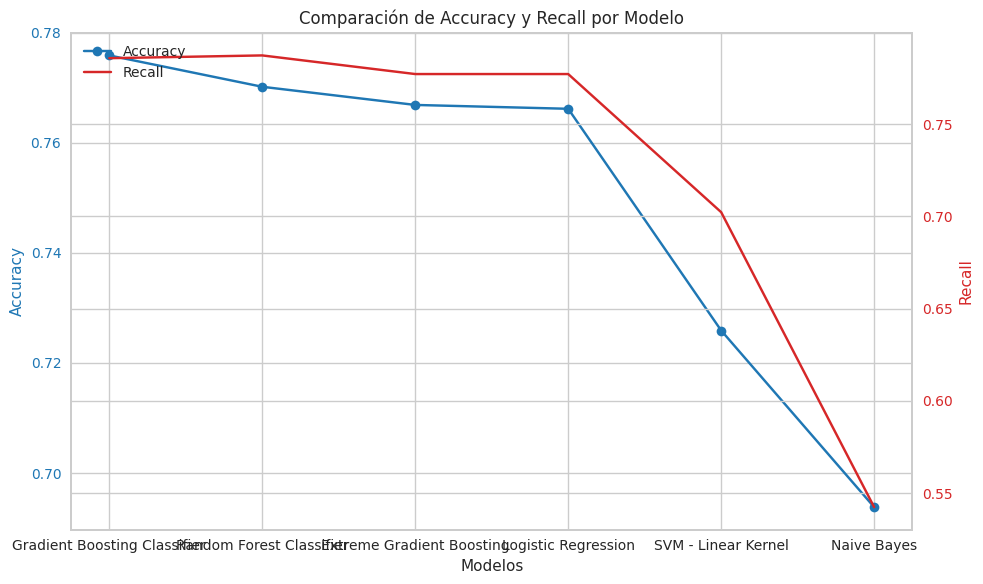

In [ ]:
# prompt: haga un grafico comparativo donde se observe el valor de accuracy y recall por cada modelo, ajustste los valores de X con los nombres de los modelos abreviados

import matplotlib.pyplot as plt

# Assuming 'results_df' is your DataFrame with model results

# Create a figure and axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot Accuracy
ax1.set_xlabel('Modelos')
ax1.set_ylabel('Accuracy', color='tab:blue')
ax1.plot(results_df['Model'], results_df['Accuracy'], marker='o', color='tab:blue', label='Accuracy')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create a second y-axis for Recall
ax2 = ax1.twinx()
ax2.set_ylabel('Recall', color='tab:red')
ax2.plot(results_df['Model'], results_df['Recall'], marker='x', color='tab:red', label='Recall')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Customize the plot
plt.title('Comparación de Accuracy y Recall por Modelo')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping


# Combine legends
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')


# Show the plot
plt.show()

In [ ]:
evaluate_model(Best_models)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…




# ENTRENAMIENTO RANDOM FOREST

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
from dask.distributed import Client

# Inicializar el cliente Dask
client = Client()  # Por defecto utiliza todos los núcleos disponibles
client

INFO:distributed.scheduler:State start
INFO:distributed.scheduler:  Scheduler at:     tcp://127.0.0.1:46703
INFO:distributed.scheduler:  dashboard at:  http://127.0.0.1:45755/status
INFO:distributed.scheduler:Registering Worker plugin shuffle
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:34835'
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:34911'
INFO:distributed.scheduler:Register worker <WorkerState 'tcp://127.0.0.1:38073', name: 1, status: init, memory: 0, processing: 0>
INFO:distributed.scheduler:Starting worker compute stream, tcp://127.0.0.1:38073
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:43772
INFO:distributed.scheduler:Register worker <WorkerState 'tcp://127.0.0.1:37647', name: 0, status: init, memory: 0, processing: 0>
INFO:distributed.scheduler:Starting worker compute stream, tcp://127.0.0.1:37647
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:43756
INFO:distributed.scheduler:Receive 

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:45755/status,
Dashboard: http://127.0.0.1:45755/status,Workers: 2
Total threads: 2,Total memory: 12.67 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:46703,Workers: 2
Dashboard: http://127.0.0.1:45755/status,Total threads: 2
Started: Just now,Total memory: 12.67 GiB
Comm: tcp://127.0.0.1:37647,Total threads: 1
Dashboard: http://127.0.0.1:46831/status,Memory: 6.34 GiB
Nanny: tcp://127.0.0.1:34835,


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
import numpy as np


### GRILLA DE HIPERPARAMETROS

In [ ]:
###### GRILLA REDUCIDA

# Importar GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, recall_score

# Definir el modelo
rf_model = RandomForestClassifier(random_state=42)

# Definir un espacio de hiperparámetros más grande
param_grid = {
    'n_estimators': [50, 100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40, 50, 60],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 4, 6, 8],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Configurar GridSearchCV en lugar de RandomizedSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid,
                           cv=3, verbose=2, n_jobs=-1, scoring=make_scorer(recall_score))

# Ajustar el GridSearchCV al conjunto de entrenamiento
grid_search.fit(X_train, y_train)

# Imprimir el recall de todos los modelos probados
print("Resultados de la búsqueda en la cuadrícula:")
for mean_score, params in zip(grid_search.cv_results_['mean_test_score'], grid_search.cv_results_['params']):
    print(f"Recall: {mean_score:.4f} con los parámetros: {params}")

# Imprimir los mejores parámetros encontrados
print("\nMejores parámetros encontrados:")
print(grid_search.best_params_)

# Imprimir la mejor puntuación obtenida
print("Mejor puntuación de recall:")
print(grid_search.best_score_)


Fitting 3 folds for each of 3150 candidates, totalling 9450 fits


KeyboardInterrupt: 

In [ ]:
###### GRILLA COMPLETA

## Importar las bibliotecas necesarias
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score
from dask.distributed import Client
import joblib

# Crear un cliente de Dask para gestionar la paralelización
client = Client()  # Esto utiliza el clúster de Dask distribuido (puedes configurarlo a nivel local o en la nube)

# Definir el modelo
rf_model = RandomForestClassifier(random_state=42)

# Definir un espacio de hiperparámetros más grande
param_grid = {
    'n_estimators': [50, 100, 200, 300, 400, 500, 700, 1000],  # Número de árboles en el bosque
    'max_depth': [None, 10, 20, 30, 40, 50, 60, 70, 80],  # Profundidad máxima de los árboles
    'min_samples_split': [2, 5, 10, 15, 20, 30],  # Mínimo número de muestras para dividir un nodo
    'min_samples_leaf': [1, 2, 4, 6, 8, 10],  # Mínimo número de muestras requeridas en una hoja
    'max_features': ['auto', 'sqrt', 'log2', 0.2, 0.5],  # Número de características a considerar al dividir
    'bootstrap': [True, False],  # Si se utiliza muestreo con reemplazo en los datos
    'criterion': ['gini', 'entropy', 'log_loss'],  # Criterio de división
    'oob_score': [True, False],  # Si se usa Out-of-Bag samples para la validación
    'max_samples': [None, 0.5, 0.7, 0.9],  # Proporción de muestras para cada estimador (si bootstrap=True)
    'class_weight': [None, 'balanced', 'balanced_subsample'],  # Ajustar pesos de clases desbalanceadas
    'max_leaf_nodes': [None, 10, 20, 30, 40, 50],  # Máximo número de nodos terminales
    'min_weight_fraction_leaf': [0.0, 0.1, 0.2],  # Fracción mínima de peso para una hoja
    'ccp_alpha': [0.0, 0.01, 0.1],  # Parámetro de poda basado en complejidad (reducción de impureza)
    'n_jobs': [-1],  # Número de procesadores paralelos (-1 usa todos)
    'random_state': [42],  # Semilla para la reproducibilidad
    'verbose': [0, 1, 2],  # Nivel de verbosidad para seguimiento del entrenamiento
}

# Utilizar Dask como backend para paralelización con joblib
with joblib.parallel_backend('dask'):
    # Configurar GridSearchCV para optimizar accuracy
    grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid,  # Cambiado a 'param_grid'
                               cv=3, verbose=2, n_jobs=-1,
                               scoring='accuracy')  # Usar accuracy como métrica de evaluación

    # Ajustar el GridSearchCV al conjunto de entrenamiento
    grid_search.fit(X_train, y_train)

# Imprimir los resultados de accuracy de todos los modelos probados
print("Resultados de la búsqueda en la cuadrícula:")
for mean_score, params in zip(grid_search.cv_results_['mean_test_score'], grid_search.cv_results_['params']):
    print(f"Accuracy: {mean_score:.4f} con los parámetros: {params}")

# Imprimir los mejores parámetros encontrados
print("\nMejores parámetros encontrados:")
print(grid_search.best_params_)

# Imprimir la mejor puntuación obtenida
print("Mejor puntuación de accuracy:")
print(grid_search.best_score_)

# Cerrar el cliente Dask cuando hayas terminado
client.close()



INFO:distributed.http.proxy:To route to workers diagnostics web server please install jupyter-server-proxy: python -m pip install jupyter-server-proxy
INFO:distributed.scheduler:State start
INFO:distributed.diskutils:Found stale lock file and directory '/tmp/dask-scratch-space/worker-_q3sjd_z', purging
INFO:distributed.diskutils:Found stale lock file and directory '/tmp/dask-scratch-space/scheduler-qlxhxs80', purging
INFO:distributed.diskutils:Found stale lock file and directory '/tmp/dask-scratch-space/worker-dq4182mm', purging
INFO:distributed.diskutils:Found stale lock file and directory '/tmp/dask-scratch-space/worker-ruyouq4d', purging
INFO:distributed.diskutils:Found stale lock file and directory '/tmp/dask-scratch-space/worker-eov031ka', purging
INFO:distributed.diskutils:Found stale lock file and directory '/tmp/dask-scratch-space/scheduler-5bce49sn', purging
INFO:distributed.diskutils:Found stale lock file and directory '/tmp/dask-scratch-space/scheduler-b8fkh0qw', purging
INF

NameError: name 'X_train' is not defined

In [ ]:
###### GRILLA RANDOM FINAL


# Definir el modelo
rf_model = RandomForestClassifier(random_state=42)

# Definir un espacio de hiperparámetros más grande
param_grid = {
    'n_estimators': [50, 100, 200, 300, 400, 500, 700, 1000],  # Número de árboles en el bosque
    'max_depth': [None, 10, 20, 30, 40, 50, 60, 70, 80],  # Profundidad máxima de los árboles
    'min_samples_split': [2, 5, 10, 15, 20, 30],  # Mínimo número de muestras para dividir un nodo
    'min_samples_leaf': [1, 2, 4, 6, 8, 10],  # Mínimo número de muestras requeridas en una hoja
    'max_features': ['auto', 'sqrt', 'log2', 0.2, 0.5],  # Número de características a considerar al dividir
    'bootstrap': [True, False],  # Si se utiliza muestreo con reemplazo en los datos
    'criterion': ['gini', 'entropy', 'log_loss'],  # Criterio de división
    'oob_score': [True, False],  # Si se usa Out-of-Bag samples para la validación
    'max_samples': [None, 0.5, 0.7, 0.9],  # Proporción de muestras para cada estimador (si bootstrap=True)
    'class_weight': [None, 'balanced', 'balanced_subsample'],  # Ajustar pesos de clases desbalanceadas
    'max_leaf_nodes': [None, 10, 20, 30, 40, 50],  # Máximo número de nodos terminales
    'min_weight_fraction_leaf': [0.0, 0.1, 0.2],  # Fracción mínima de peso para una hoja
    'ccp_alpha': [0.0, 0.01, 0.1],  # Parámetro de poda basado en complejidad (reducción de impureza)
    'n_jobs': [-1],  # Número de procesadores paralelos (-1 usa todos)
    'random_state': [42],  # Semilla para la reproducibilidad
    'verbose': [0, 1, 2],  # Nivel de verbosidad para seguimiento del entrenamiento
}

# Configurar RandomizedSearchCV en lugar de GridSearchCV
random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_grid,
                                   n_iter=1000, cv=5, verbose=2, random_state=42, n_jobs=-1,
                                   scoring='accuracy')  # Usar accuracy como métrica de evaluación

# Ajustar el RandomizedSearchCV al conjunto de entrenamiento
random_search.fit(X_train, y_train)

# Imprimir el accuracy de todos los modelos probados
print("Resultados de la búsqueda en la cuadrícula:")
for mean_score, params in zip(random_search.cv_results_['mean_test_score'], random_search.cv_results_['params']):
    print(f"Accuracy: {mean_score:.4f} con los parámetros: {params}")

# Imprimir los mejores parámetros encontrados
print("\nMejores parámetros encontrados:")
print(random_search.best_params_)

# Imprimir la mejor puntuación obtenida
print("Mejor puntuación de accuracy:")
print(random_search.best_score_)


Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
2775 fits failed out of a total of 5000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1385 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py", line 433, in fit
    raise ValueError(
ValueError: `max_sample` cannot be set if `bootstrap=Fa

Resultados de la búsqueda en la cuadrícula:
Accuracy: nan con los parámetros: {'verbose': 2, 'random_state': 42, 'oob_score': False, 'n_jobs': -1, 'n_estimators': 500, 'min_weight_fraction_leaf': 0.1, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_samples': 0.5, 'max_leaf_nodes': 40, 'max_features': 'sqrt', 'max_depth': 60, 'criterion': 'log_loss', 'class_weight': 'balanced_subsample', 'ccp_alpha': 0.0, 'bootstrap': False}
Accuracy: nan con los parámetros: {'verbose': 2, 'random_state': 42, 'oob_score': True, 'n_jobs': -1, 'n_estimators': 200, 'min_weight_fraction_leaf': 0.1, 'min_samples_split': 30, 'min_samples_leaf': 4, 'max_samples': 0.5, 'max_leaf_nodes': 10, 'max_features': 'log2', 'max_depth': 70, 'criterion': 'log_loss', 'class_weight': 'balanced_subsample', 'ccp_alpha': 0.01, 'bootstrap': False}
Accuracy: 0.6646 con los parámetros: {'verbose': 2, 'random_state': 42, 'oob_score': False, 'n_jobs': -1, 'n_estimators': 300, 'min_weight_fraction_leaf': 0.1, 'min_samples_split



## MODELO DEFINITIVO RF






### 1. Entrenamiento

In [ ]:
# Importar RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Crear un nuevo modelo con los mejores parámetros
best_rf_model = RandomForestClassifier(
    n_estimators=1000,  # Número de árboles en el bosque
    max_depth=20,  # Profundidad máxima de los árboles
    min_samples_split=10,  # Mínimo número de muestras para dividir un nodo
    min_samples_leaf=2,  # Mínimo número de muestras requeridas en una hoja
    max_features=0.2,  # Número de características a considerar al dividir
    bootstrap=True,  # Si se utiliza muestreo con reemplazo en los datos
    criterion='log_loss',  # Criterio de división
    oob_score=True,  # Si se usa Out-of-Bag samples para la validación
    max_samples=0.9,  # Proporción de muestras para cada estimador (si bootstrap=True)
    class_weight='balanced_subsample',  # Ajustar pesos de clases desbalanceadas
    max_leaf_nodes=None,  # Máximo número de nodos terminales
    min_weight_fraction_leaf=0.0,  # Fracción mínima de peso para una hoja
    ccp_alpha=0.0,  # Parámetro de poda basado en complejidad (reducción de impureza)
    n_jobs=-1,  # Número de procesadores paralelos (-1 usa todos)
    random_state=42,  # Semilla para la reproducibilidad
    verbose=2 # Nivel de verbosidad para seguimiento del entrenamiento
)

# Entrenar el modelo con los datos de entrenamiento
best_rf_model.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


building tree 1 of 1000
building tree 2 of 1000
building tree 3 of 1000
building tree 4 of 1000
building tree 5 of 1000
building tree 6 of 1000
building tree 7 of 1000
building tree 8 of 1000
building tree 9 of 1000
building tree 10 of 1000
building tree 11 of 1000
building tree 12 of 1000
building tree 13 of 1000
building tree 14 of 1000
building tree 15 of 1000
building tree 16 of 1000
building tree 17 of 1000
building tree 18 of 1000
building tree 19 of 1000
building tree 20 of 1000
building tree 21 of 1000
building tree 22 of 1000
building tree 23 of 1000
building tree 24 of 1000
building tree 25 of 1000building tree 26 of 1000

building tree 27 of 1000
building tree 28 of 1000
building tree 29 of 1000
building tree 30 of 1000
building tree 31 of 1000building tree 32 of 1000

building tree 33 of 1000
building tree 34 of 1000
building tree 35 of 1000
building tree 36 of 1000
building tree 37 of 1000
building tree 38 of 1000
building tree 39 of 1000
building tree 40 of 1000


[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    2.1s


building tree 41 of 1000
building tree 42 of 1000
building tree 43 of 1000
building tree 44 of 1000
building tree 45 of 1000
building tree 46 of 1000
building tree 47 of 1000
building tree 48 of 1000
building tree 49 of 1000
building tree 50 of 1000
building tree 51 of 1000
building tree 52 of 1000
building tree 53 of 1000building tree 54 of 1000

building tree 55 of 1000
building tree 56 of 1000
building tree 57 of 1000
building tree 58 of 1000
building tree 59 of 1000
building tree 60 of 1000
building tree 61 of 1000
building tree 62 of 1000building tree 63 of 1000

building tree 64 of 1000
building tree 65 of 1000
building tree 66 of 1000building tree 67 of 1000

building tree 68 of 1000building tree 69 of 1000

building tree 70 of 1000
building tree 71 of 1000
building tree 72 of 1000
building tree 73 of 1000
building tree 74 of 1000
building tree 75 of 1000
building tree 76 of 1000
building tree 77 of 1000
building tree 78 of 1000
building tree 79 of 1000
building tree 80 of 1000


[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:    5.8s


building tree 162 of 1000
building tree 163 of 1000
building tree 164 of 1000
building tree 165 of 1000
building tree 166 of 1000
building tree 167 of 1000
building tree 168 of 1000
building tree 169 of 1000
building tree 170 of 1000
building tree 171 of 1000
building tree 172 of 1000
building tree 174 of 1000building tree 173 of 1000

building tree 175 of 1000
building tree 176 of 1000
building tree 177 of 1000
building tree 178 of 1000
building tree 179 of 1000
building tree 180 of 1000
building tree 181 of 1000building tree 182 of 1000

building tree 183 of 1000building tree 184 of 1000

building tree 185 of 1000
building tree 186 of 1000
building tree 187 of 1000
building tree 188 of 1000building tree 189 of 1000

building tree 190 of 1000
building tree 191 of 1000
building tree 192 of 1000
building tree 193 of 1000
building tree 194 of 1000
building tree 195 of 1000
building tree 196 of 1000
building tree 197 of 1000
building tree 198 of 1000
building tree 199 of 1000
building tre

[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:   10.0s


building tree 367 of 1000
building tree 368 of 1000
building tree 369 of 1000building tree 370 of 1000

building tree 371 of 1000
building tree 372 of 1000
building tree 373 of 1000
building tree 374 of 1000
building tree 375 of 1000
building tree 376 of 1000
building tree 377 of 1000
building tree 378 of 1000
building tree 379 of 1000building tree 380 of 1000

building tree 381 of 1000
building tree 382 of 1000
building tree 383 of 1000building tree 384 of 1000

building tree 385 of 1000
building tree 386 of 1000
building tree 387 of 1000
building tree 388 of 1000
building tree 389 of 1000
building tree 390 of 1000
building tree 391 of 1000building tree 392 of 1000

building tree 393 of 1000
building tree 394 of 1000
building tree 395 of 1000
building tree 396 of 1000
building tree 397 of 1000
building tree 398 of 1000
building tree 399 of 1000
building tree 400 of 1000
building tree 401 of 1000
building tree 402 of 1000
building tree 403 of 1000
building tree 404 of 1000
building tre

[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed:   20.1s


building tree 648 of 1000
building tree 649 of 1000
building tree 650 of 1000
building tree 651 of 1000
building tree 652 of 1000
building tree 653 of 1000
building tree 654 of 1000
building tree 655 of 1000
building tree 656 of 1000
building tree 657 of 1000
building tree 658 of 1000
building tree 659 of 1000
building tree 660 of 1000
building tree 661 of 1000
building tree 662 of 1000
building tree 663 of 1000
building tree 664 of 1000
building tree 665 of 1000
building tree 666 of 1000
building tree 667 of 1000
building tree 668 of 1000
building tree 669 of 1000
building tree 670 of 1000
building tree 671 of 1000
building tree 672 of 1000
building tree 673 of 1000
building tree 674 of 1000
building tree 675 of 1000
building tree 676 of 1000
building tree 677 of 1000
building tree 678 of 1000
building tree 679 of 1000
building tree 680 of 1000
building tree 681 of 1000
building tree 682 of 1000
building tree 683 of 1000
building tree 684 of 1000
building tree 685 of 1000
building tre

[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   27.2s finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='log_loss',
                       max_depth=20, max_features=0.2, max_leaf_nodes=None,
                       max_samples=0.9, min_impurity_decrease=0.0,
                       min_samples_leaf=2, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, monotonic_cst=None,
                       n_estimators=1000, n_jobs=-1, oob_score=True,
                       random_state=42, verbose=2, warm_start=False)

### 2. Evaluacion

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 158 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 361 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 644 tasks      | elapsed:    0.8s
[Parallel(n_jobs=2)]: Done 1000 out of 1000 | elapsed:    1.4s finished


              precision    recall  f1-score   support

           0       0.75      0.78      0.76       807
           1       0.79      0.76      0.77       876

    accuracy                           0.77      1683
   macro avg       0.77      0.77      0.77      1683
weighted avg       0.77      0.77      0.77      1683



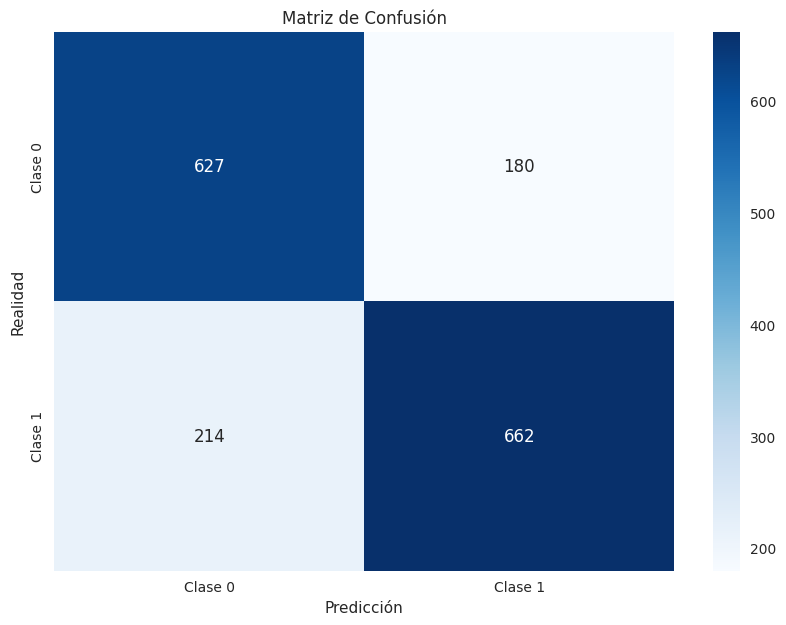

In [ ]:
# Evaluar el modelo
y_pred = best_rf_model.predict(X_test)

# Generar un reporte de clasificación
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
# Mostrar la matriz de confusión
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Clase 0', 'Clase 1'], yticklabels=['Clase 0', 'Clase 1'])
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.title('Matriz de Confusión')
plt.show()

### 3. Validacion Cruzada

In [ ]:
# prompt: REALIZAR VALIDACION CRUZADA PARA EVALUAR EL MODELO ANTERIOR

from sklearn.model_selection import cross_val_score

# Realizar validación cruzada con 5 folds
cv_scores = cross_val_score(best_rf_model, X, y, cv=5, scoring='accuracy')

# Imprimir los resultados de la validación cruzada
print("Scores de Validación Cruzada:", cv_scores)
print("Accuracy promedio de Validación Cruzada:", cv_scores.mean())


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


building tree 1 of 1000building tree 2 of 1000

building tree 3 of 1000
building tree 4 of 1000
building tree 5 of 1000
building tree 6 of 1000
building tree 7 of 1000
building tree 8 of 1000
building tree 9 of 1000
building tree 10 of 1000
building tree 11 of 1000
building tree 12 of 1000
building tree 13 of 1000
building tree 14 of 1000building tree 15 of 1000

building tree 16 of 1000
building tree 17 of 1000
building tree 18 of 1000building tree 19 of 1000

building tree 20 of 1000
building tree 21 of 1000
building tree 22 of 1000
building tree 23 of 1000
building tree 24 of 1000
building tree 25 of 1000
building tree 26 of 1000
building tree 27 of 1000
building tree 28 of 1000
building tree 29 of 1000
building tree 30 of 1000
building tree 31 of 1000
building tree 32 of 1000
building tree 33 of 1000
building tree 34 of 1000
building tree 35 of 1000
building tree 36 of 1000
building tree 37 of 1000
building tree 38 of 1000
building tree 39 of 1000
building tree 40 of 1000
building 

[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    1.9s


building tree 42 of 1000
building tree 43 of 1000
building tree 44 of 1000
building tree 45 of 1000
building tree 46 of 1000
building tree 47 of 1000
building tree 48 of 1000building tree 49 of 1000

building tree 50 of 1000building tree 51 of 1000

building tree 52 of 1000
building tree 53 of 1000
building tree 54 of 1000
building tree 55 of 1000
building tree 56 of 1000
building tree 57 of 1000
building tree 58 of 1000
building tree 59 of 1000
building tree 60 of 1000
building tree 61 of 1000
building tree 62 of 1000
building tree 63 of 1000
building tree 64 of 1000
building tree 65 of 1000
building tree 66 of 1000
building tree 67 of 1000
building tree 68 of 1000
building tree 69 of 1000
building tree 70 of 1000
building tree 71 of 1000
building tree 72 of 1000
building tree 73 of 1000
building tree 74 of 1000
building tree 75 of 1000
building tree 76 of 1000
building tree 77 of 1000
building tree 78 of 1000
building tree 79 of 1000
building tree 80 of 1000
building tree 81 of 1000


[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:    8.5s


building tree 161 of 1000
building tree 162 of 1000
building tree 163 of 1000
building tree 164 of 1000
building tree 165 of 1000
building tree 166 of 1000
building tree 167 of 1000
building tree 168 of 1000
building tree 169 of 1000
building tree 170 of 1000
building tree 171 of 1000
building tree 172 of 1000
building tree 173 of 1000
building tree 174 of 1000
building tree 175 of 1000
building tree 176 of 1000
building tree 177 of 1000
building tree 178 of 1000
building tree 179 of 1000
building tree 180 of 1000
building tree 181 of 1000
building tree 182 of 1000
building tree 183 of 1000
building tree 184 of 1000
building tree 185 of 1000
building tree 186 of 1000
building tree 187 of 1000
building tree 188 of 1000
building tree 189 of 1000
building tree 190 of 1000
building tree 191 of 1000
building tree 192 of 1000
building tree 193 of 1000
building tree 194 of 1000
building tree 195 of 1000building tree 196 of 1000

building tree 197 of 1000
building tree 198 of 1000
building tre

[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:   19.5s


building tree 373 of 1000
building tree 374 of 1000
building tree 375 of 1000
building tree 376 of 1000
building tree 377 of 1000
building tree 378 of 1000
building tree 379 of 1000
building tree 380 of 1000
building tree 381 of 1000
building tree 382 of 1000
building tree 383 of 1000
building tree 384 of 1000
building tree 385 of 1000
building tree 386 of 1000
building tree 387 of 1000
building tree 388 of 1000
building tree 389 of 1000
building tree 390 of 1000
building tree 391 of 1000
building tree 392 of 1000
building tree 393 of 1000
building tree 394 of 1000
building tree 395 of 1000
building tree 396 of 1000
building tree 397 of 1000
building tree 398 of 1000
building tree 399 of 1000
building tree 400 of 1000
building tree 401 of 1000
building tree 402 of 1000
building tree 403 of 1000
building tree 404 of 1000
building tree 405 of 1000
building tree 406 of 1000
building tree 407 of 1000
building tree 408 of 1000
building tree 409 of 1000
building tree 410 of 1000
building tre

[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed:   26.1s



building tree 654 of 1000
building tree 655 of 1000
building tree 656 of 1000
building tree 657 of 1000
building tree 658 of 1000
building tree 659 of 1000
building tree 660 of 1000
building tree 661 of 1000
building tree 662 of 1000
building tree 663 of 1000
building tree 664 of 1000
building tree 665 of 1000
building tree 666 of 1000
building tree 667 of 1000
building tree 668 of 1000
building tree 669 of 1000
building tree 670 of 1000
building tree 671 of 1000
building tree 672 of 1000
building tree 673 of 1000
building tree 674 of 1000
building tree 675 of 1000
building tree 676 of 1000
building tree 677 of 1000
building tree 678 of 1000
building tree 679 of 1000
building tree 680 of 1000
building tree 681 of 1000
building tree 682 of 1000
building tree 683 of 1000
building tree 684 of 1000
building tree 685 of 1000
building tree 686 of 1000
building tree 687 of 1000
building tree 688 of 1000
building tree 689 of 1000
building tree 690 of 1000
building tree 691 of 1000
building tr

[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   38.3s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 158 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 361 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 644 tasks      | elapsed:    0.5s
[Parallel(n_jobs=2)]: Done 1000 out of 1000 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


building tree 1 of 1000
building tree 2 of 1000
building tree 3 of 1000
building tree 4 of 1000
building tree 5 of 1000
building tree 6 of 1000
building tree 7 of 1000
building tree 8 of 1000
building tree 9 of 1000
building tree 10 of 1000
building tree 11 of 1000
building tree 12 of 1000
building tree 13 of 1000
building tree 14 of 1000
building tree 15 of 1000
building tree 16 of 1000
building tree 17 of 1000
building tree 18 of 1000
building tree 19 of 1000
building tree 20 of 1000
building tree 21 of 1000
building tree 22 of 1000
building tree 23 of 1000
building tree 24 of 1000
building tree 25 of 1000
building tree 26 of 1000
building tree 27 of 1000
building tree 28 of 1000
building tree 29 of 1000
building tree 30 of 1000
building tree 31 of 1000
building tree 32 of 1000
building tree 33 of 1000
building tree 34 of 1000
building tree 35 of 1000
building tree 36 of 1000
building tree 37 of 1000
building tree 38 of 1000
building tree 39 of 1000
building tree 40 of 1000
building 

[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    0.8s


building tree 42 of 1000
building tree 43 of 1000
building tree 44 of 1000building tree 45 of 1000

building tree 46 of 1000
building tree 47 of 1000
building tree 48 of 1000
building tree 49 of 1000
building tree 50 of 1000
building tree 51 of 1000
building tree 52 of 1000
building tree 53 of 1000
building tree 54 of 1000
building tree 55 of 1000
building tree 56 of 1000
building tree 57 of 1000
building tree 58 of 1000
building tree 59 of 1000
building tree 60 of 1000
building tree 61 of 1000
building tree 62 of 1000
building tree 63 of 1000
building tree 64 of 1000
building tree 65 of 1000
building tree 66 of 1000
building tree 67 of 1000
building tree 68 of 1000
building tree 69 of 1000
building tree 70 of 1000
building tree 71 of 1000
building tree 72 of 1000
building tree 73 of 1000
building tree 74 of 1000
building tree 75 of 1000
building tree 76 of 1000
building tree 77 of 1000
building tree 78 of 1000
building tree 79 of 1000
building tree 80 of 1000
building tree 81 of 1000


[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:    4.2s


building tree 160 of 1000
building tree 161 of 1000
building tree 162 of 1000building tree 163 of 1000

building tree 164 of 1000
building tree 165 of 1000
building tree 166 of 1000building tree 167 of 1000

building tree 168 of 1000
building tree 169 of 1000
building tree 170 of 1000
building tree 171 of 1000
building tree 172 of 1000
building tree 173 of 1000
building tree 174 of 1000
building tree 175 of 1000
building tree 176 of 1000
building tree 177 of 1000
building tree 178 of 1000
building tree 179 of 1000
building tree 180 of 1000
building tree 181 of 1000
building tree 182 of 1000
building tree 183 of 1000
building tree 184 of 1000
building tree 185 of 1000
building tree 186 of 1000
building tree 187 of 1000
building tree 188 of 1000
building tree 189 of 1000
building tree 190 of 1000
building tree 191 of 1000
building tree 192 of 1000
building tree 193 of 1000
building tree 194 of 1000
building tree 195 of 1000
building tree 196 of 1000
building tree 197 of 1000
building tre

[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:   12.9s


building tree 363 of 1000
building tree 364 of 1000
building tree 365 of 1000
building tree 366 of 1000
building tree 367 of 1000
building tree 368 of 1000
building tree 369 of 1000
building tree 370 of 1000
building tree 371 of 1000
building tree 372 of 1000
building tree 373 of 1000
building tree 374 of 1000
building tree 375 of 1000
building tree 376 of 1000
building tree 377 of 1000
building tree 378 of 1000
building tree 379 of 1000
building tree 380 of 1000
building tree 381 of 1000
building tree 382 of 1000
building tree 383 of 1000
building tree 384 of 1000
building tree 385 of 1000
building tree 386 of 1000building tree 387 of 1000

building tree 388 of 1000
building tree 389 of 1000
building tree 390 of 1000
building tree 391 of 1000
building tree 392 of 1000
building tree 393 of 1000
building tree 394 of 1000
building tree 395 of 1000
building tree 396 of 1000building tree 397 of 1000

building tree 398 of 1000
building tree 399 of 1000
building tree 400 of 1000
building tre

[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed:   19.7s


building tree 649 of 1000building tree 650 of 1000

building tree 651 of 1000
building tree 652 of 1000
building tree 653 of 1000
building tree 654 of 1000
building tree 655 of 1000
building tree 656 of 1000
building tree 657 of 1000
building tree 658 of 1000
building tree 659 of 1000
building tree 660 of 1000
building tree 661 of 1000
building tree 662 of 1000
building tree 663 of 1000
building tree 664 of 1000
building tree 665 of 1000
building tree 666 of 1000
building tree 667 of 1000
building tree 668 of 1000building tree 669 of 1000

building tree 670 of 1000
building tree 671 of 1000
building tree 672 of 1000
building tree 673 of 1000
building tree 674 of 1000
building tree 675 of 1000
building tree 676 of 1000building tree 677 of 1000

building tree 678 of 1000
building tree 679 of 1000
building tree 680 of 1000
building tree 681 of 1000
building tree 682 of 1000
building tree 683 of 1000
building tree 684 of 1000
building tree 685 of 1000
building tree 686 of 1000
building tre

[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   32.0s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 158 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 361 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 644 tasks      | elapsed:    0.5s
[Parallel(n_jobs=2)]: Done 1000 out of 1000 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


building tree 1 of 1000
building tree 2 of 1000
building tree 3 of 1000
building tree 4 of 1000
building tree 5 of 1000
building tree 6 of 1000
building tree 7 of 1000
building tree 8 of 1000
building tree 9 of 1000
building tree 10 of 1000
building tree 11 of 1000
building tree 12 of 1000
building tree 13 of 1000
building tree 14 of 1000
building tree 15 of 1000
building tree 16 of 1000
building tree 17 of 1000
building tree 18 of 1000
building tree 19 of 1000
building tree 20 of 1000
building tree 21 of 1000
building tree 22 of 1000
building tree 23 of 1000
building tree 24 of 1000
building tree 25 of 1000
building tree 26 of 1000
building tree 27 of 1000
building tree 28 of 1000building tree 29 of 1000

building tree 30 of 1000
building tree 31 of 1000
building tree 32 of 1000
building tree 33 of 1000
building tree 34 of 1000
building tree 35 of 1000
building tree 36 of 1000
building tree 37 of 1000
building tree 38 of 1000
building tree 39 of 1000
building tree 40 of 1000
building 

[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    0.8s


building tree 42 of 1000
building tree 43 of 1000
building tree 44 of 1000
building tree 45 of 1000
building tree 46 of 1000
building tree 47 of 1000
building tree 48 of 1000
building tree 49 of 1000
building tree 50 of 1000
building tree 51 of 1000
building tree 52 of 1000
building tree 53 of 1000
building tree 54 of 1000
building tree 55 of 1000
building tree 56 of 1000
building tree 57 of 1000
building tree 58 of 1000
building tree 59 of 1000
building tree 60 of 1000
building tree 61 of 1000
building tree 62 of 1000
building tree 63 of 1000building tree 64 of 1000

building tree 65 of 1000
building tree 66 of 1000
building tree 67 of 1000
building tree 68 of 1000
building tree 69 of 1000
building tree 70 of 1000
building tree 71 of 1000
building tree 72 of 1000
building tree 73 of 1000building tree 74 of 1000

building tree 75 of 1000
building tree 76 of 1000
building tree 77 of 1000
building tree 78 of 1000
building tree 79 of 1000
building tree 80 of 1000
building tree 81 of 1000


[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:    3.7s


building tree 166 of 1000
building tree 167 of 1000
building tree 168 of 1000
building tree 169 of 1000
building tree 170 of 1000
building tree 171 of 1000
building tree 172 of 1000
building tree 173 of 1000
building tree 174 of 1000
building tree 175 of 1000
building tree 176 of 1000
building tree 177 of 1000
building tree 178 of 1000
building tree 179 of 1000
building tree 180 of 1000
building tree 181 of 1000
building tree 182 of 1000
building tree 183 of 1000
building tree 184 of 1000
building tree 185 of 1000building tree 186 of 1000

building tree 187 of 1000
building tree 188 of 1000
building tree 189 of 1000
building tree 190 of 1000
building tree 191 of 1000
building tree 192 of 1000
building tree 193 of 1000
building tree 194 of 1000
building tree 195 of 1000building tree 196 of 1000

building tree 197 of 1000
building tree 198 of 1000
building tree 199 of 1000
building tree 200 of 1000
building tree 201 of 1000
building tree 202 of 1000
building tree 203 of 1000
building tre

[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:   12.3s


building tree 366 of 1000
building tree 367 of 1000
building tree 368 of 1000
building tree 369 of 1000
building tree 370 of 1000
building tree 371 of 1000
building tree 372 of 1000
building tree 373 of 1000
building tree 374 of 1000
building tree 375 of 1000
building tree 376 of 1000building tree 377 of 1000

building tree 378 of 1000
building tree 379 of 1000
building tree 380 of 1000
building tree 381 of 1000
building tree 382 of 1000
building tree 383 of 1000
building tree 384 of 1000
building tree 385 of 1000
building tree 386 of 1000
building tree 387 of 1000
building tree 388 of 1000
building tree 389 of 1000
building tree 390 of 1000
building tree 391 of 1000
building tree 392 of 1000
building tree 393 of 1000
building tree 394 of 1000
building tree 395 of 1000
building tree 396 of 1000
building tree 397 of 1000
building tree 398 of 1000
building tree 399 of 1000
building tree 400 of 1000
building tree 401 of 1000building tree 402 of 1000

building tree 403 of 1000
building tre

[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed:   18.8s


building tree 655 of 1000
building tree 656 of 1000
building tree 657 of 1000
building tree 658 of 1000
building tree 659 of 1000
building tree 660 of 1000
building tree 661 of 1000
building tree 662 of 1000
building tree 663 of 1000
building tree 664 of 1000
building tree 665 of 1000
building tree 666 of 1000
building tree 667 of 1000
building tree 668 of 1000
building tree 669 of 1000
building tree 670 of 1000
building tree 671 of 1000
building tree 672 of 1000
building tree 673 of 1000
building tree 674 of 1000
building tree 675 of 1000
building tree 676 of 1000
building tree 677 of 1000
building tree 678 of 1000
building tree 679 of 1000building tree 680 of 1000

building tree 681 of 1000
building tree 682 of 1000
building tree 683 of 1000
building tree 684 of 1000
building tree 685 of 1000
building tree 686 of 1000
building tree 687 of 1000
building tree 688 of 1000
building tree 689 of 1000
building tree 690 of 1000
building tree 691 of 1000
building tree 692 of 1000
building tre

[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   32.0s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 158 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 361 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 644 tasks      | elapsed:    0.5s
[Parallel(n_jobs=2)]: Done 1000 out of 1000 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


building tree 1 of 1000
building tree 2 of 1000
building tree 3 of 1000building tree 4 of 1000

building tree 5 of 1000
building tree 6 of 1000
building tree 7 of 1000building tree 8 of 1000

building tree 9 of 1000
building tree 10 of 1000
building tree 11 of 1000
building tree 12 of 1000
building tree 13 of 1000
building tree 14 of 1000
building tree 15 of 1000
building tree 16 of 1000
building tree 17 of 1000
building tree 18 of 1000
building tree 19 of 1000
building tree 20 of 1000
building tree 21 of 1000
building tree 22 of 1000
building tree 23 of 1000
building tree 24 of 1000
building tree 25 of 1000
building tree 26 of 1000
building tree 27 of 1000
building tree 28 of 1000
building tree 29 of 1000
building tree 30 of 1000
building tree 31 of 1000
building tree 32 of 1000
building tree 33 of 1000
building tree 34 of 1000building tree 35 of 1000

building tree 36 of 1000
building tree 37 of 1000
building tree 38 of 1000
building tree 39 of 1000
building tree 40 of 1000


[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    0.9s


building tree 41 of 1000
building tree 42 of 1000
building tree 43 of 1000
building tree 44 of 1000
building tree 45 of 1000
building tree 46 of 1000
building tree 47 of 1000
building tree 48 of 1000building tree 49 of 1000

building tree 50 of 1000
building tree 51 of 1000
building tree 52 of 1000
building tree 53 of 1000
building tree 54 of 1000building tree 55 of 1000

building tree 56 of 1000
building tree 57 of 1000
building tree 58 of 1000
building tree 59 of 1000
building tree 60 of 1000
building tree 61 of 1000
building tree 62 of 1000
building tree 63 of 1000
building tree 64 of 1000
building tree 65 of 1000
building tree 66 of 1000building tree 67 of 1000

building tree 68 of 1000
building tree 69 of 1000
building tree 70 of 1000
building tree 71 of 1000
building tree 72 of 1000
building tree 73 of 1000
building tree 74 of 1000
building tree 75 of 1000
building tree 76 of 1000
building tree 77 of 1000
building tree 78 of 1000
building tree 79 of 1000
building tree 80 of 1000


[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:    3.6s


building tree 160 of 1000
building tree 161 of 1000
building tree 162 of 1000
building tree 163 of 1000
building tree 164 of 1000
building tree 165 of 1000
building tree 166 of 1000
building tree 167 of 1000
building tree 168 of 1000
building tree 169 of 1000
building tree 170 of 1000
building tree 171 of 1000
building tree 172 of 1000
building tree 173 of 1000
building tree 174 of 1000
building tree 175 of 1000
building tree 176 of 1000
building tree 177 of 1000
building tree 178 of 1000
building tree 179 of 1000
building tree 180 of 1000
building tree 181 of 1000
building tree 182 of 1000
building tree 183 of 1000
building tree 184 of 1000
building tree 185 of 1000
building tree 186 of 1000
building tree 187 of 1000
building tree 188 of 1000
building tree 189 of 1000
building tree 190 of 1000
building tree 191 of 1000
building tree 192 of 1000
building tree 193 of 1000
building tree 194 of 1000
building tree 195 of 1000
building tree 196 of 1000
building tree 197 of 1000building tree

[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:   11.4s


building tree 366 of 1000
building tree 367 of 1000
building tree 368 of 1000
building tree 369 of 1000
building tree 370 of 1000
building tree 371 of 1000
building tree 372 of 1000
building tree 373 of 1000
building tree 374 of 1000
building tree 375 of 1000
building tree 376 of 1000
building tree 377 of 1000
building tree 378 of 1000
building tree 379 of 1000
building tree 380 of 1000
building tree 381 of 1000
building tree 382 of 1000
building tree 383 of 1000
building tree 384 of 1000
building tree 385 of 1000
building tree 386 of 1000
building tree 387 of 1000
building tree 388 of 1000
building tree 389 of 1000
building tree 390 of 1000
building tree 391 of 1000
building tree 392 of 1000
building tree 393 of 1000
building tree 394 of 1000
building tree 395 of 1000
building tree 396 of 1000
building tree 397 of 1000
building tree 398 of 1000
building tree 399 of 1000
building tree 400 of 1000
building tree 401 of 1000
building tree 402 of 1000
building tree 403 of 1000
building tre

[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed:   19.4s


building tree 646 of 1000
building tree 647 of 1000
building tree 648 of 1000
building tree 649 of 1000
building tree 650 of 1000
building tree 651 of 1000
building tree 652 of 1000
building tree 653 of 1000
building tree 654 of 1000
building tree 655 of 1000
building tree 656 of 1000
building tree 657 of 1000
building tree 658 of 1000building tree 659 of 1000

building tree 660 of 1000
building tree 661 of 1000
building tree 662 of 1000
building tree 663 of 1000
building tree 664 of 1000
building tree 665 of 1000
building tree 666 of 1000
building tree 667 of 1000
building tree 668 of 1000
building tree 669 of 1000
building tree 670 of 1000
building tree 671 of 1000
building tree 672 of 1000
building tree 673 of 1000
building tree 674 of 1000
building tree 675 of 1000
building tree 676 of 1000
building tree 677 of 1000
building tree 678 of 1000
building tree 679 of 1000
building tree 680 of 1000
building tree 681 of 1000
building tree 682 of 1000
building tree 683 of 1000
building tre

[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   30.9s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 158 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 361 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 644 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 1000 out of 1000 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


building tree 1 of 1000building tree 2 of 1000

building tree 3 of 1000
building tree 4 of 1000
building tree 5 of 1000
building tree 6 of 1000
building tree 7 of 1000
building tree 8 of 1000
building tree 9 of 1000
building tree 10 of 1000
building tree 11 of 1000
building tree 12 of 1000
building tree 13 of 1000
building tree 14 of 1000
building tree 15 of 1000
building tree 16 of 1000
building tree 17 of 1000
building tree 18 of 1000
building tree 19 of 1000
building tree 20 of 1000
building tree 21 of 1000
building tree 22 of 1000
building tree 23 of 1000
building tree 24 of 1000
building tree 25 of 1000
building tree 26 of 1000
building tree 27 of 1000
building tree 28 of 1000
building tree 29 of 1000
building tree 30 of 1000
building tree 31 of 1000
building tree 32 of 1000
building tree 33 of 1000
building tree 34 of 1000
building tree 35 of 1000
building tree 36 of 1000
building tree 37 of 1000
building tree 38 of 1000
building tree 39 of 1000
building tree 40 of 1000


[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    0.9s


building tree 41 of 1000building tree 42 of 1000

building tree 43 of 1000
building tree 44 of 1000
building tree 45 of 1000
building tree 46 of 1000
building tree 47 of 1000
building tree 48 of 1000
building tree 49 of 1000
building tree 50 of 1000
building tree 51 of 1000
building tree 52 of 1000
building tree 53 of 1000
building tree 54 of 1000
building tree 55 of 1000
building tree 56 of 1000
building tree 57 of 1000
building tree 58 of 1000
building tree 59 of 1000
building tree 60 of 1000
building tree 61 of 1000
building tree 62 of 1000
building tree 63 of 1000building tree 64 of 1000

building tree 65 of 1000
building tree 66 of 1000
building tree 67 of 1000
building tree 68 of 1000
building tree 69 of 1000
building tree 70 of 1000
building tree 71 of 1000
building tree 72 of 1000
building tree 73 of 1000
building tree 74 of 1000
building tree 75 of 1000
building tree 76 of 1000
building tree 77 of 1000
building tree 78 of 1000
building tree 79 of 1000
building tree 80 of 1000


[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:    3.5s


building tree 166 of 1000
building tree 167 of 1000
building tree 168 of 1000
building tree 169 of 1000
building tree 170 of 1000building tree 171 of 1000

building tree 172 of 1000
building tree 173 of 1000
building tree 174 of 1000building tree 175 of 1000

building tree 176 of 1000
building tree 177 of 1000
building tree 178 of 1000
building tree 179 of 1000
building tree 180 of 1000
building tree 181 of 1000
building tree 182 of 1000
building tree 183 of 1000
building tree 184 of 1000
building tree 185 of 1000
building tree 186 of 1000
building tree 187 of 1000
building tree 188 of 1000
building tree 189 of 1000building tree 190 of 1000

building tree 191 of 1000
building tree 192 of 1000
building tree 193 of 1000
building tree 194 of 1000
building tree 195 of 1000
building tree 196 of 1000
building tree 197 of 1000
building tree 198 of 1000
building tree 199 of 1000
building tree 200 of 1000
building tree 201 of 1000
building tree 202 of 1000
building tree 203 of 1000
building tre

[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:    9.3s


building tree 364 of 1000
building tree 365 of 1000
building tree 366 of 1000
building tree 367 of 1000
building tree 368 of 1000
building tree 369 of 1000
building tree 370 of 1000building tree 371 of 1000

building tree 372 of 1000
building tree 373 of 1000
building tree 374 of 1000
building tree 375 of 1000building tree 376 of 1000

building tree 377 of 1000
building tree 378 of 1000
building tree 379 of 1000
building tree 380 of 1000
building tree 381 of 1000
building tree 382 of 1000
building tree 383 of 1000
building tree 384 of 1000
building tree 385 of 1000
building tree 386 of 1000
building tree 387 of 1000
building tree 388 of 1000
building tree 389 of 1000
building tree 390 of 1000
building tree 391 of 1000building tree 392 of 1000

building tree 393 of 1000building tree 394 of 1000

building tree 395 of 1000building tree 396 of 1000

building tree 397 of 1000
building tree 398 of 1000
building tree 399 of 1000
building tree 400 of 1000
building tree 401 of 1000
building tre

[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed:   19.8s


building tree 648 of 1000
building tree 649 of 1000
building tree 650 of 1000
building tree 651 of 1000
building tree 652 of 1000
building tree 653 of 1000
building tree 654 of 1000
building tree 655 of 1000
building tree 656 of 1000
building tree 657 of 1000
building tree 658 of 1000building tree 659 of 1000

building tree 660 of 1000
building tree 661 of 1000
building tree 662 of 1000building tree 663 of 1000

building tree 664 of 1000
building tree 665 of 1000
building tree 666 of 1000
building tree 667 of 1000
building tree 668 of 1000building tree 669 of 1000

building tree 670 of 1000
building tree 671 of 1000
building tree 672 of 1000
building tree 673 of 1000
building tree 674 of 1000building tree 675 of 1000

building tree 676 of 1000
building tree 677 of 1000
building tree 678 of 1000building tree 679 of 1000

building tree 680 of 1000
building tree 681 of 1000
building tree 682 of 1000
building tree 683 of 1000
building tree 684 of 1000
building tree 685 of 1000
building tre

[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   29.7s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 158 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 361 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 644 tasks      | elapsed:    0.5s


Scores de Validación Cruzada: [0.78609626 0.75757576 0.78698752 0.77272727 0.77272727]
Accuracy promedio de Validación Cruzada: 0.7752228163992869


[Parallel(n_jobs=2)]: Done 1000 out of 1000 | elapsed:    0.8s finished


### 4. Importancia de Caracteristicas

<ipython-input-38-b61b5ecc7066>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df_top, palette='viridis')


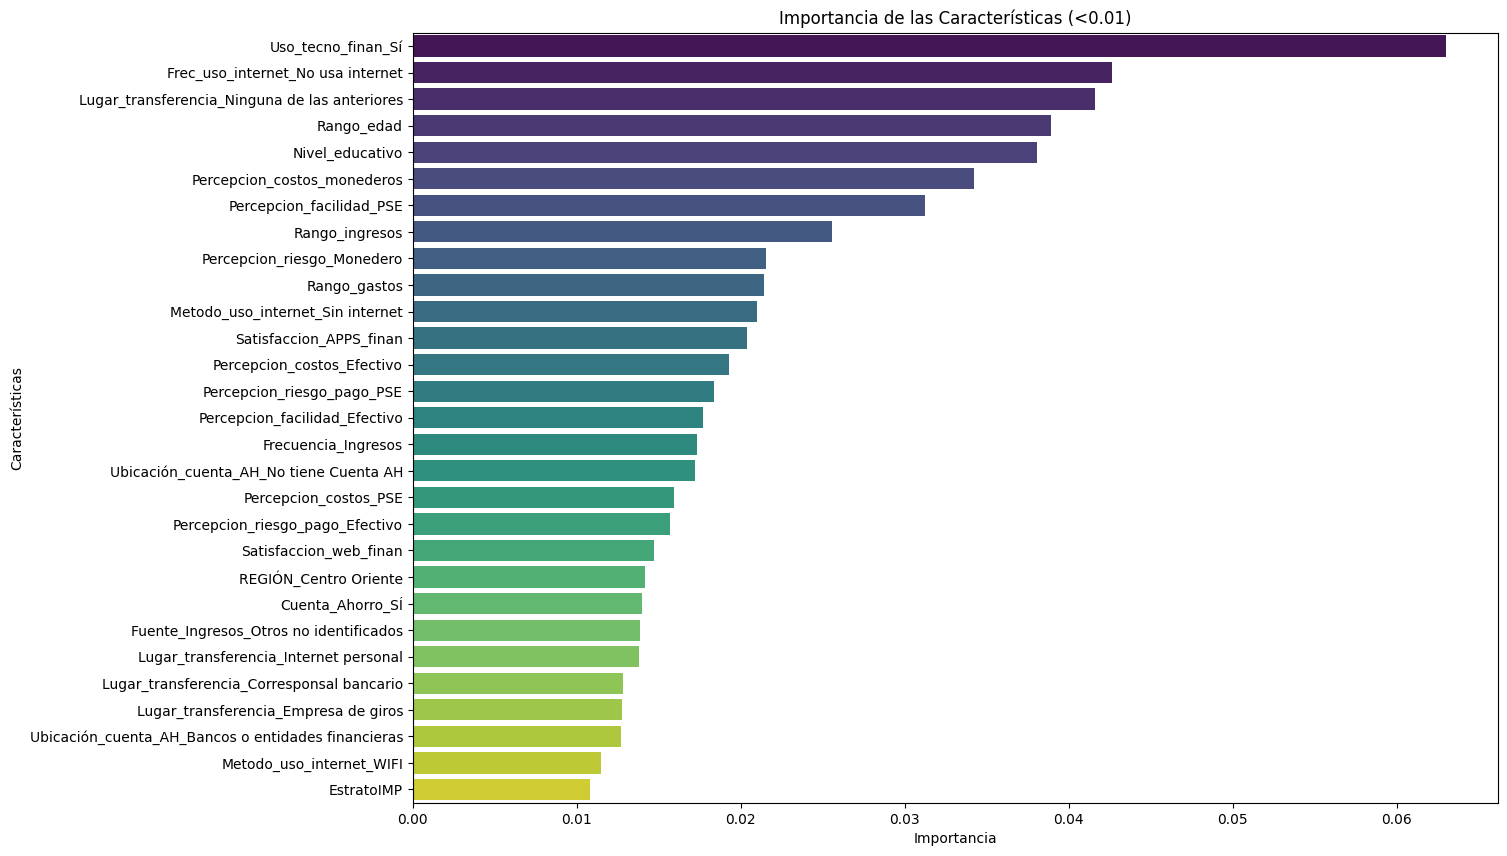

In [ ]:
# Importancia de características
importances = best_rf_model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Limitar el número de características a mostrar solamente a las que tienen importancia mayor a 0.01

importance_df_top = importance_df[importance_df['Importance'] > 0.01]

# Mostrar la importancia de las características
plt.figure(figsize=(14, 10))
sns.barplot(x='Importance', y='Feature', data=importance_df_top, palette='viridis')
plt.title('Importancia de las Características (<0.01)')
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.show()

In [ ]:
importance_df_top

,Feature,Importance
122,Uso_tecno_finan_Sí,0.063020
35,Frec_uso_internet_No usa internet,0.042639
53,Lugar_transferencia_Ninguna de las anteriores,0.041617
14,Rango_edad,0.038935
10,Nivel_educativo,0.038065
3,Percepcion_costos_monederos,0.034231
6,Percepcion_facilidad_PSE,0.031241
11,Rango_ingresos,0.025549
0,Percepcion_riesgo_Monedero,0.021520
12,Rango_gastos,0.021414


# MODELO DEFINITIVO FI>1






In [ ]:
# Definir la variable dependiente (target) y las variables independientes (features)
X = df_encoded[[
    'Uso_tecno_finan_Sí',
    'Frec_uso_internet_No usa internet',
    'Lugar_transferencia_Ninguna de las anteriores',
    'Rango_edad',
    'Nivel_educativo',
    'Percepcion_costos_monederos',
    'Percepcion_facilidad_PSE',
    'Rango_ingresos',
    'Percepcion_riesgo_Monedero',
    'Rango_gastos',
    'Metodo_uso_internet_Sin internet',
    'Satisfaccion_APPS_finan',
    'Percepcion_costos_Efectivo',
    'Percepcion_riesgo_pago_PSE',
    'Percepcion_facilidad_Efectivo',
    'Frecuencia_Ingresos',
    'Ubicación_cuenta_AH_No tiene Cuenta AH',
    'Percepcion_costos_PSE',
    'Percepcion_riesgo_pago_Efectivo',
    'Satisfaccion_web_finan',
    'REGIÓN_Centro Oriente',
    'Cuenta_Ahorro_SÍ',
    'Fuente_Ingresos_Otros no identificados',
    'Lugar_transferencia_Internet personal',
    'Lugar_transferencia_Corresponsal bancario',
    'Lugar_transferencia_Empresa de giros',
    'Ubicación_cuenta_AH_Bancos o entidades financieras',
    'Metodo_uso_internet_WIFI',
    'EstratoIMP',
    'Uso_efectivo_mes_Sí',
    'Entidad_queja_No se ha quejado'
]]

y = df_encoded['Pago_Digital']

In [ ]:
# Convertir columnas booleanas a enteros (0 y 1)
X = X.applymap(lambda x: int(x) if isinstance(x, bool) else x)

# Asegurarse de que todas las variables sean numéricas
X = X.apply(pd.to_numeric, errors='coerce')

# Reemplazar cualquier NaN restante por 0 o cualquier otra estrategia de imputación que prefieras
X = X.fillna(0)

<ipython-input-41-65b7ad1ee5d9>:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X = X.applymap(lambda x: int(x) if isinstance(x, bool) else x)


In [ ]:
from sklearn.model_selection import train_test_split
# Dividir los datos en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,  # 30% de los datos se utilizarán para prueba
    random_state=42  # Semilla para reproducibilidad
)

print(f'Dimensión del conjunto de entrenamiento: {X_train.shape}')
print(f'Dimensión del conjunto de prueba: {X_test.shape}')

Dimensión del conjunto de entrenamiento: (3927, 31)
Dimensión del conjunto de prueba: (1683, 31)


### 1. Entrenamiento

In [ ]:
# Importar RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Crear un nuevo modelo con los mejores parámetros
best_rf_model_fi = RandomForestClassifier(
    n_estimators=300,  # Número de árboles en el bosque
    max_depth=60,  # Profundidad máxima de los árboles
    min_samples_split=10,  # Mínimo número de muestras para dividir un nodo
    min_samples_leaf=8,  # Mínimo número de muestras requeridas en una hoja
    max_features='sqrt',  # Número de características a considerar al dividir
    bootstrap=True,  # Si se utiliza muestreo con reemplazo en los datos
    criterion='entropy',  # Criterio de división
    oob_score=True,  # Si se usa Out-of-Bag samples para la validación
    max_samples=None,  # Proporción de muestras para cada estimador (si bootstrap=True)
    ##class_weight='balanced',  # Ajustar pesos de clases desbalanceadas
    max_leaf_nodes=40,  # Máximo número de nodos terminales
    ##min_weight_fraction_leaf=0.1,  # Fracción mínima de peso para una hoja
    ##ccp_alpha=0.1,  # Parámetro de poda basado en complejidad (reducción de impureza)
    n_jobs=-1,  # Número de procesadores paralelos (-1 usa todos)
    random_state=42,  # Semilla para la reproducibilidad
    ##verbose=2 # Nivel de verbosidad para seguimiento del entrenamiento
)

# Entrenar el modelo con los datos de entrenamiento
best_rf_model_fi.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=60, max_leaf_nodes=40,
                       min_samples_leaf=8, min_samples_split=10,
                       n_estimators=300, n_jobs=-1, oob_score=True,
                       random_state=42)

### 2. Evaluacion

              precision    recall  f1-score   support

           0       0.75      0.75      0.75       807
           1       0.77      0.77      0.77       876

    accuracy                           0.76      1683
   macro avg       0.76      0.76      0.76      1683
weighted avg       0.76      0.76      0.76      1683



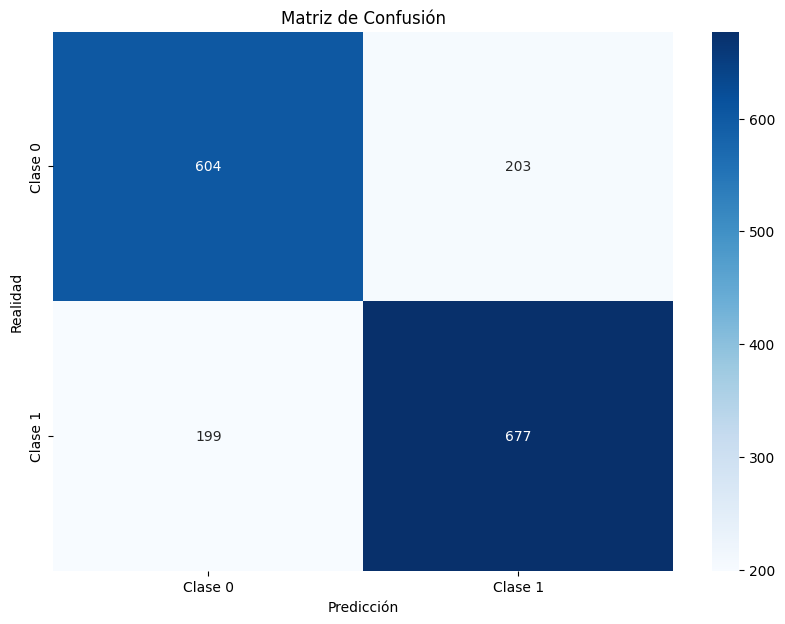

In [ ]:
# Evaluar el modelo
y_pred = best_rf_model_fi.predict(X_test)

# Generar un reporte de clasificación
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
# Mostrar la matriz de confusión
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Clase 0', 'Clase 1'], yticklabels=['Clase 0', 'Clase 1'])
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.title('Matriz de Confusión')
plt.show()

### 3. Validacion Cruzada

In [ ]:
# prompt: REALIZAR VALIDACION CRUZADA PARA EVALUAR EL MODELO ANTERIOR

from sklearn.model_selection import cross_val_score

# Realizar validación cruzada con 5 folds
cv_scores = cross_val_score(best_rf_model_fi, X, y, cv=5, scoring='accuracy')

# Imprimir los resultados de la validación cruzada
print("Scores de Validación Cruzada:", cv_scores)
print("Accuracy promedio de Validación Cruzada:", cv_scores.mean())


Scores de Validación Cruzada: [0.77272727 0.74688057 0.78342246 0.76381462 0.7540107 ]
Accuracy promedio de Validación Cruzada: 0.7641711229946523


### 4. Importancia de Caracteristicas

<ipython-input-48-87255b1e9982>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df_top, palette='viridis')


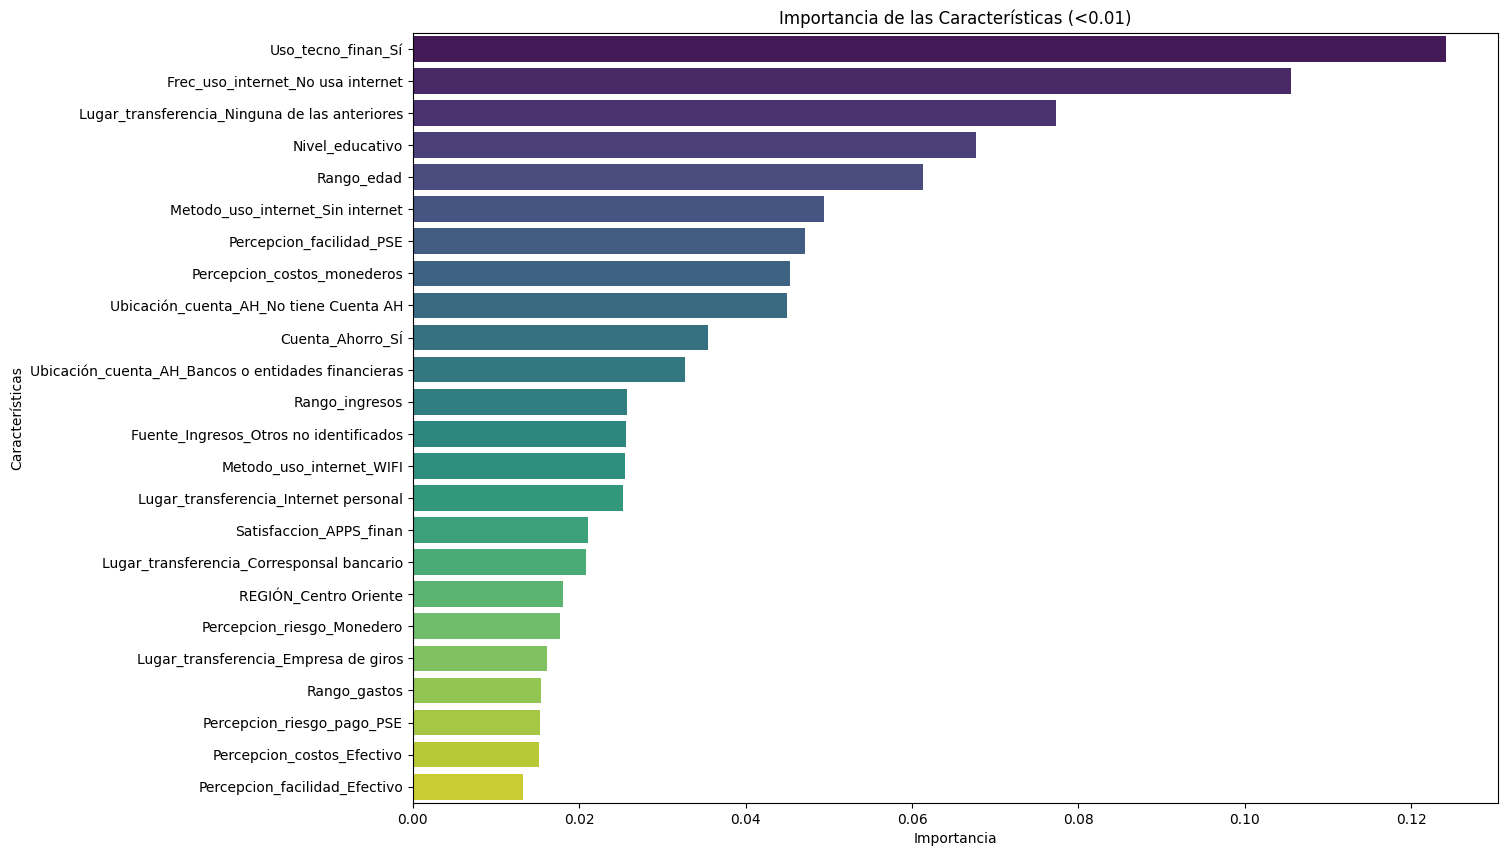

In [ ]:
# Importancia de características
importances = best_rf_model_fi.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Limitar el número de características a mostrar solamente a las que tienen importancia mayor a 0.01

importance_df_top = importance_df[importance_df['Importance'] > 0.01]

# Mostrar la importancia de las características
plt.figure(figsize=(14, 10))
sns.barplot(x='Importance', y='Feature', data=importance_df_top, palette='viridis')
plt.title('Importancia de las Características (<0.01)')
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.show()

In [ ]:
importance_df_top

,Feature,Importance
0,Uso_tecno_finan_Sí,0.124178
1,Frec_uso_internet_No usa internet,0.105529
2,Lugar_transferencia_Ninguna de las anteriores,0.077336
4,Nivel_educativo,0.067703
3,Rango_edad,0.061371
10,Metodo_uso_internet_Sin internet,0.049393
6,Percepcion_facilidad_PSE,0.047172
5,Percepcion_costos_monederos,0.045353
16,Ubicación_cuenta_AH_No tiene Cuenta AH,0.044918
21,Cuenta_Ahorro_SÍ,0.035531
